# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM , Dense

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# Import data and normalization

In [2]:
scaler = MinMaxScaler(feature_range=(0,1))

In [3]:
dataframe = pd.read_csv("/resources/international-airline-passengers.csv",usecols=[1], skipfooter=3)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')

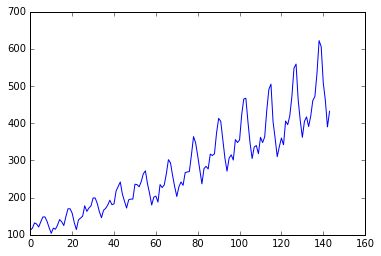

In [5]:
plt.plot(dataset)
plt.show()

In [6]:
dataset = scaler.fit_transform(dataset)

In [7]:
dataset.shape

(144, 1)

In [8]:
split_point = int(len(dataset)*0.7)
train , test = dataset[:split_point,:] , dataset[split_point:,:]

In [9]:
len(dataset) , len(train) , len(test)

(144, 100, 44)

# Build input and output dataset

In [10]:
def create_database(dataset, look_back = 1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:i+look_back,0])
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX) , np.reshape(np.array(dataY), [len(dataY),1])

In [11]:
look_back = 3
trainX, trainY = create_database(train, look_back)
testX, testY = create_database(test, look_back)

In [12]:
trainX.shape , trainY.shape , testX.shape , testY.shape

((96, 3), (96, 1), (40, 3), (40, 1))

In [13]:
# reshape input to be [samples, time steps, features]
# input dim = features
# we can import data in 2 ways: 
# 1) import a n-dim vector in one time step with features and input_dim equal to length of vector
# 2) import data in n time step with one feature and input dim equals to one

trainX = np.reshape(trainX, [trainX.shape[0], 1, trainX.shape[1]])
testX = np.reshape(testX, [testX.shape[0], 1, testX.shape[1]])

# Build model

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,3)))
model.add(Dense(1))

# Compile and train model

In [15]:
model.compile(loss=tf.losses.mean_squared_error, optimizer=tf.train.AdamOptimizer())

In [16]:
model.fit(trainX, trainY, batch_size=1, nb_epoch=100, verbose=2)

/resources/common/.virtualenv/python2/lib/python2.7/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1s - loss: 0.0417
Epoch 2/100
0s - loss: 0.0152
Epoch 3/100
0s - loss: 0.0111
Epoch 4/100
0s - loss: 0.0097
Epoch 5/100
0s - loss: 0.0085
Epoch 6/100
0s - loss: 0.0074
Epoch 7/100
0s - loss: 0.0066
Epoch 8/100
0s - loss: 0.0059
Epoch 9/100
0s - loss: 0.0055
Epoch 10/100
0s - loss: 0.0049
Epoch 11/100
0s - loss: 0.0046
Epoch 12/100
0s - loss: 0.0045
Epoch 13/100
0s - loss: 0.0043
Epoch 14/100
0s - loss: 0.0041
Epoch 15/100
0s - loss: 0.0041
Epoch 16/100
0s - loss: 0.0040
Epoch 17/100
0s - loss: 0.0040
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0037
Epoch 21/100
0s - loss: 0.0037
Epoch 22/100
0s - loss: 0.0037
Epoch 23/100
0s - loss: 0.0037
Epoch 24/100
0s - loss: 0.0036
Epoch 25/100
0s - loss: 0.0035
Epoch 26/100
0s - loss: 0.0036
Epoch 27/100
0s - loss: 0.0035
Epoch 28/100
0s - loss: 0.0035
Epoch 29/100
0s - loss: 0.0035
Epoch 30/100
0s - loss: 0.0036
Epoch 31/100
0s - loss: 0.0034
Epoch 32/100
0s - loss: 0.0034
Epoch 33/100
0s -

In [17]:
train_pred = model.predict(trainX)
test_pred = model.predict(testX)

# Rescale data to original scale

In [18]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

# Plot results

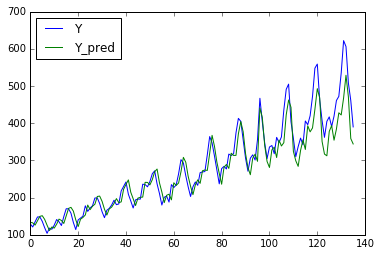

In [19]:
Y = np.concatenate([trainY,testY])
Y_pred = np.concatenate([train_pred,test_pred])
plt.plot(Y,hold=True)
plt.plot(Y_pred)
plt.legend(['Y', 'Y_pred'],loc=0)
plt.show()